
### Data Mining and Machine Learning
###  Edgar Acuna
#### February 2020
## Data preparation  I: Reading the data file and counting the  missing values
#### Dataset: Adult also known as Census, available at the  UCI

In [33]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Reading the data from the UCI

In [34]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
    header=None, sep=',',na_values=[' ?'])

df.columns=['v1', 'v2', 'v3', 'v4', 'v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','class']

### Obteniendo informacion acerca de las variables del dataset

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
v1       32561 non-null int64
v2       30725 non-null object
v3       32561 non-null int64
v4       32561 non-null object
v5       32561 non-null int64
v6       32561 non-null object
v7       30718 non-null object
v8       32561 non-null object
v9       32561 non-null object
v10      32561 non-null object
v11      32561 non-null int64
v12      32561 non-null int64
v13      32561 non-null int64
v14      31978 non-null object
class    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
df.head(15)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [37]:
#Another way to read the data
# Load CSV using Pandas from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8','v9','v10','v11','v12','v13','v14','class']
data = pd.read_csv(url, names=names,na_values=[' ?'])
print(data.shape) #imprimiendo la dimension de los datos

(32561, 15)


## Reading the data locally

In [38]:
#df = pd.read_csv('c://PW-PR/census.csv',sep=',',na_values=[' ?'])
df=pd.read_csv('http://academic.uprm.edu/eacuna/census.csv',sep=",",na_values=[' ?'])

In [39]:
#information about the dataset allowing us to notice that there are  missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
employment        30725 non-null object
final-weight      32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
job               30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Notar que las columnas v2(employment), v7(job) y v14 (native.country) tienen distintos numeros de  entradas que las otras columnas debido a que rienen datos faltantes 

In [40]:
#imprimiendo los primeros 20 elementos de la tabla
df.head(20)

,age,employment,final-weight,education,education.num,marital.status,job,relationship,race,gender,capital-gain,capital-loss,hours.per.week,native.country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [41]:
#imprimiendo las ultimas 5 filas de la tabla
df.tail()

,age,employment,final-weight,education,education.num,marital.status,job,relationship,race,gender,capital-gain,capital-loss,hours.per.week,native.country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [42]:
#Imprimiendo la dimension del dataset
print(df.shape)

(32561, 15)


The dataset has 32561 instances amd 15 attributes

#### Imprimiendo algunas estadisticas de las variables que son continuas

In [43]:
df.describe()

,age,final-weight,education.num,capital-gain,capital-loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Imprimiendo algunas estadisticas de las variables que son nominales

In [44]:
df.describe(include=['O'])

,employment,education,marital.status,job,relationship,race,gender,native.country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Filtering

#### Calculando el porcentaje de sujetos por cada nivel de Educacion

In [45]:
tabla=pd.crosstab(index=df['education'],columns='counts')
tabla['frec.relativa.porc']=tabla*100/tabla.sum()
tabla

col_0,counts,frec.relativa.porc
education,,
10th,933,2.865391
11th,1175,3.608612
12th,433,1.329812
1st-4th,168,0.515955
5th-6th,333,1.022696
7th-8th,646,1.983969
9th,514,1.578576
Assoc-acdm,1067,3.276926
Assoc-voc,1382,4.244341


#### Calculando la cantidad de sujetos por cada nicel salarial

In [46]:
df.groupby(by =['salary', 'gender']).size()

salary  gender 
 <=50K   Female     9592
         Male      15128
 >50K    Female     1179
         Male       6662
dtype: int64

#### Extrayendo del dataset un subset que incluya a los sujetos que tienen menos de 30 anos

In [47]:
df1=df[df['age']<30]

In [48]:
df2=df[df.age<30]
df2.shape

(9711, 15)

In [49]:
df3=df.query('age<30')
df3.shape

(9711, 15)

In [50]:
p_table = pd.pivot_table(df,index='salary',columns='gender',aggfunc='size')
p_table

gender,Female,Male
salary,,
<=50K,9592,15128
>50K,1179,6662


## Visualization

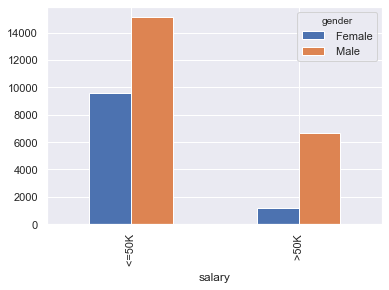

In [51]:
#Barras en cluster usando matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
p_table.plot.bar(stacked=False)

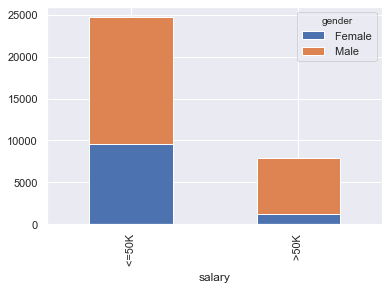

In [52]:
#Barras en stack usando matplotlib
p_table.plot.bar(stacked=True)

<Figure size 432x288 with 0 Axes>

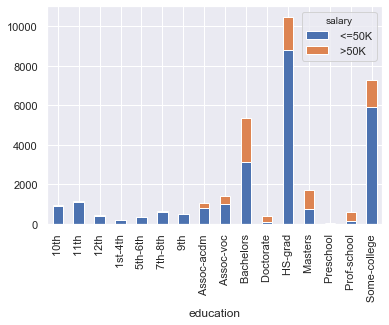

In [53]:
p_table1 = pd.pivot_table(df,index='education',columns='salary',aggfunc='size')
plt.figure()
p_table1.plot.bar(stacked=True)

## Handling Missing Values

In [54]:
#cotejando si la tabla tiene missing values
df.isnull()

,age,employment,final-weight,education,education.num,marital.status,job,relationship,race,gender,capital-gain,capital-loss,hours.per.week,native.country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Finding the number of columns with missings

In [55]:
df.isnull().any().sum()

3

Finding the columns containing missing values

In [56]:
colmiss=df.columns[df.isnull().any()].tolist()
print(colmiss)

['employment', 'job', 'native.country']


Finding the number of missings per column

In [57]:
df[colmiss].isnull().sum()

employment        1836
job               1843
native.country     583
dtype: int64

Finding the percentage of missings per column

In [58]:
df[colmiss].isnull().sum()*100/len(df)

employment        5.638647
job               5.660146
native.country    1.790486
dtype: float64

In [59]:
#Otra manera de hallar el numero de entradas missings en cada columna
df.apply(lambda x: sum(x.isnull().values), axis = 0)

age                  0
employment        1836
final-weight         0
education            0
education.num        0
marital.status       0
job               1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours.per.week       0
native.country     583
salary               0
dtype: int64

Finding rows containing missing values

In [60]:
rowmiss=df.index[df.isnull().T.any()].tolist()

Finding the number of rows containing missing values

In [61]:
df.isnull().T.any().sum()

2399

Finding the percentage of rows with missing values

In [62]:
df.isnull().T.any().sum()*100/len(df)

7.36770983692147

Second method:

In [63]:
sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0) 

2399

Third method:

In [64]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

2399

Finding the total number of cells containing missing values

In [65]:
df.isnull().sum().sum()

4262

Eliminating all the rows containing at least missing values

In [66]:
dfclean=df.dropna()
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
employment        30162 non-null object
final-weight      30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
job               30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
gender            30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
salary            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Eliminando las columnas con nomas de 60 porciento de missing values

In [67]:
from math import floor
bound=floor(len(df)*.40)
dfclean=df.dropna(thresh=bound,axis='columns') 
print(dfclean.shape)

(32561, 15)


Ninguna columna fue eliminada

Eliminando las filas con no mas de one missing

In [68]:
dfclean=df.dropna(thresh=14,axis='rows') 
print(dfclean.shape)

(30725, 15)


Size of table after eliminating records withn misssing values

In [69]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
employment        30725 non-null object
final-weight      30725 non-null int64
education         30725 non-null object
education.num     30725 non-null int64
marital.status    30725 non-null object
job               30718 non-null object
relationship      30725 non-null object
race              30725 non-null object
gender            30725 non-null object
capital-gain      30725 non-null int64
capital-loss      30725 non-null int64
hours.per.week    30725 non-null int64
native.country    30169 non-null object
salary            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


Elimnando secuencialente filas con un 40% de missings y no mas de un missing

In [70]:
dfclean1=df.dropna(thresh=bound,axis='columns').dropna(thresh=14,axis='rows') 

In [71]:
dfclean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 15 columns):
age               30725 non-null int64
employment        30725 non-null object
final-weight      30725 non-null int64
education         30725 non-null object
education.num     30725 non-null int64
marital.status    30725 non-null object
job               30718 non-null object
relationship      30725 non-null object
race              30725 non-null object
gender            30725 non-null object
capital-gain      30725 non-null int64
capital-loss      30725 non-null int64
hours.per.week    30725 non-null int64
native.country    30169 non-null object
salary            30725 non-null object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


In [72]:
print(dfclean1.shape)

(30725, 15)
